# Portfolio Methodolgy

1. DGI/Growth Names - Rebalance every 6 months picking around 2 - 3 names from CA and US universe
    - Sell Covered Calls on names and re-enter if called away.
    - **GTC Stop Limit of 5% on each name**
2. VAA/PAA - Rebalance every month on trading day 1
3. LEAPS - Rebalance every 3 months picking around 3 - 8 names from US universe (high growth potential names)
    - Current Holdings: LOPE STOR PNW SBUX
    - LOPE Earnings: Nov 8
    - PNW Earnings: Nov 8
    - SBUX Earnings: Jan 23
        - **Exit Criteria: When the call option drops below 60 delta**
4. Short Vol - Short SPX Spreads at the beginning of the month and hold until second or last week to maturity
    - Potentially long UVXY/VXX puts at beginning of the month with bracket orders
    - **Short ATM SPX Put spreads around 25 points wide**
        - **Long bi-weekly unit puts, around -7% or so of SPX spot (or something with a cost of 15% of the credit)**
        - **The SPX put spread will have a capped max loss of 2,500 per contract, while in low volatility, the bi-weekly units are severely underpriced and will explode 10X to 20X in value if the long strike in the spread gets tested. Vega and Gamma play a huge factor in the repricing of these units.**
        - Initiate the units every 2 weeks letting them run to expiry
5. Barbell Hedging
    - Long SPX puts or VIX calls during high crisis potential moments
        - Initiate bracket orders with SPX Puts: +/- 30% of Cost Basis
    - Check VIX Futures volume trends and see impact of Feb 5, 2018
    - Only trade 4 naked SPX puts in Reg accounts
        - Sell half into profits/losses 
    - Only trade 6 3:1 Put back ratios in Reg Account: Leg into these positions because of how illiquid the market is
    - Take losses immediately (10% - 30% of Cost Basis)
    - NEVER EVER try to put on a position of the market is illiquid: YOU WILL get filled at horrible prices
    - **Put on 1-5 Delta strangles on the open of the day and close position at the end of the day around 2 pm to 3 pm**
6. Treasuries - Re-establish monthly bills beginning of month or at maturity

##### Strategy Weights
|Strategy|Weight|Last Rebal|Next Check|Next Full Rebal|
|-|-|-|-|-|
|VAA/PAA|25%|11/01/2018|12/01/2018|12/01/2018|
|LEAPs|5%|11/01/2018|12/01/2018|01/01/2019|
|Short Vol|2%|NA|NA|NA|
|Barbell Hedging|1.5%|11/06/2018|11/09/2018|11/19/2018|
|Treasuries|60%|11/01/2018|11/29/2018|12/01/2018|

## Key Modules to Run

- fundamental_data_collect.py to run monthly to collected latest financial statements and key stats from yahoo
- finstatement_cleaning.py to run right after fundamental_data_collect.py to create cleaned data for earnings plays



In [281]:
# Importing necessary models
import warnings
warnings.filterwarnings('ignore')

import smtplib
import pandas as pd
import numpy as np
import datetime as dt
import pandas.stats.moments as st
import time
%matplotlib inline
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

import os
main_dir = os.getcwd()

os.chdir('C:\\Users\\Fang\\Desktop\\Python Trading\\Trading\\Trading\\Modules\\DataCollection')

from alphavantage import *
from yahoo_query import *
from option_slam_earnings import *
from reuters_query import reuters_query
from alphaquery import alphaquery

os.chdir('C:\\Users\\Fang\\Desktop\\Python Trading\\Trading\\Trading\\Modules\\Options')
from optionsFunctions import *

os.chdir('C:\\Users\\Fang\\Desktop\\Python Trading\\Trading\\Trading\\Modules\\Earnings')
from yahoo_earnings import *
from lookup_earnings import lookup_earnings

os.chdir('C:\\Users\\Fang\\Desktop\\Python Trading\\Trading\\Trading\\Modules\\Processing')
from hv_calc import *

os.chdir(main_dir)

# Allocate Smartly Checking

In [250]:
# Short Call Assignment Price - 287.5

portfolio_value =  200000

as_lst = ['DBC',
        'HYG',
        'IEF',
        'IWM',
        'LQD',
        'QQQ',
        'SPY',
        'VNQ']
as_wgt = [0.014,
        0.014,
        0.417,
        0.014,
        0.500,
        0.014,
        0.014,
        0.014]

as_df = pd.DataFrame({'Allocation': as_wgt}, index = as_lst)
curr_spot = curr_batch_quotes(as_lst)
as_df = pd.concat([as_df,curr_spot[['price']]], axis = 1)

as_df['Market Value'] = portfolio_value*as_df.Allocation
as_df['Holdings'] = np.round(as_df['Market Value']/as_df.price,0)

as_df

,Allocation,price,Market Value,Holdings
symbol,,,,
DBC,0.014,16.705,2800.0,168.0
HYG,0.014,84.540,2800.0,33.0
IEF,0.417,99.930,83400.0,835.0
IWM,0.014,154.610,2800.0,18.0
LQD,0.500,112.145,100000.0,892.0
QQQ,0.014,170.710,2800.0,16.0
SPY,0.014,275.550,2800.0,10.0
VNQ,0.014,79.585,2800.0,35.0


## Checking market correlations

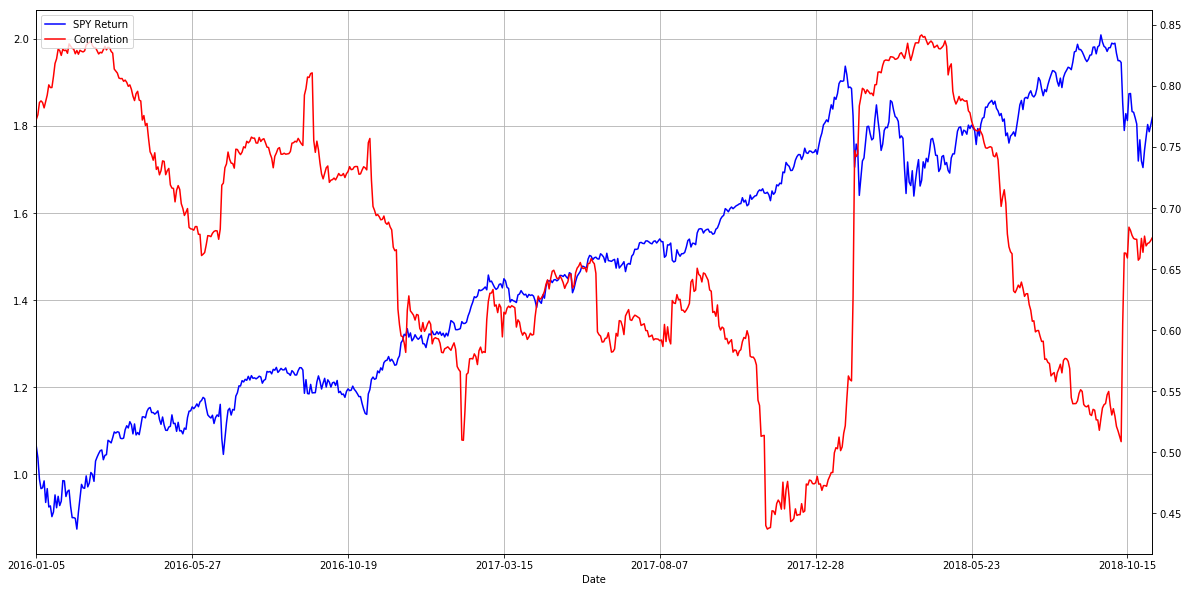

                XLRE       XLV       XLI       XLK       XLP       XLU  \
2018-10-31  0.395356  0.908453  0.852474  0.916932  0.415250 -0.006917   
2018-11-01  0.399878  0.910993  0.856426  0.917836  0.427726 -0.016608   
2018-11-02  0.404528  0.911463  0.855520  0.914758  0.431493 -0.010320   
2018-11-05  0.406407  0.911579  0.855287  0.911142  0.435100  0.000804   
2018-11-06  0.410559  0.912896  0.856025  0.912025  0.438923  0.009735   

                 XLB       XLF       XLE       XLY  Avg_Corr   SPY_cum  
2018-10-31  0.759625  0.813259  0.729650  0.906124  0.669021  1.773914  
2018-11-01  0.759765  0.812704  0.734797  0.907035  0.671055  1.803434  
2018-11-02  0.761571  0.811104  0.735113  0.901108  0.671634  1.786829  
2018-11-05  0.760761  0.807639  0.746910  0.898857  0.673448  1.802204  
2018-11-06  0.761025  0.809330  0.748661  0.898487  0.675767  1.819833  


In [251]:
rolling_window = 60
plot_window = 10000

corr_df, sector_df = check_mkt_corr(rolling_window, plot_window)
print(corr_df.tail())

In [252]:
((sector_df.dropna() + 1).cumprod()-1).tail()

,SPY,XLRE,XLV,XLI,XLK,XLP,XLU,XLB,XLF,XLE,XLY,XLC
2018-10-31,-0.017677,0.018730,0.045251,-0.045746,-0.029819,0.077360,0.069735,-0.100530,-0.039122,-0.101418,-0.057255,-0.078463
2018-11-01,-0.007223,0.022540,0.058449,-0.028950,-0.018480,0.084998,0.064953,-0.075227,-0.034735,-0.093792,-0.038021,-0.073058
2018-11-02,-0.013103,0.013968,0.051850,-0.030589,-0.037659,0.079318,0.058976,-0.077449,-0.035466,-0.096066,-0.034085,-0.082466
2018-11-05,-0.007659,0.030794,0.061160,-0.025536,-0.038639,0.092832,0.073919,-0.074714,-0.020110,-0.080947,-0.032743,-0.086269
2018-11-06,-0.001416,0.036508,0.066580,-0.015294,-0.032619,0.099295,0.081490,-0.059497,-0.014991,-0.076666,-0.028449,-0.080865


## Earnings

**Key modules to run**
- new_earnings_setup.py for given date in string form 'yyyy-mm-dd': this gives the latest input data for earnings_prediction
- earnings_prediction.py for determining position to take on earnings name

In [247]:
date_lookup = '2018-11-07'

curr_earnings = date_earnings(date_lookup)
curr_earnings = curr_earnings[curr_earnings['Call Time'].isin(['After Market Close', 'Before Market Open'])]

In [259]:
acs = curr_earnings[curr_earnings['Call Time'] == 'After Market Close']
focus_names = acs.index.drop_duplicates().tolist()
acs

,Call Time,EPS Estimate,Name
XXII,After Market Close,-,22nd Century Group Inc
UHAL,After Market Close,7.91,Amerco
ANSS,After Market Close,1.09,ANSYS Inc
ADT,After Market Close,0.26,ADT Inc
ACHV,After Market Close,-1.28,Achieve Life Sciences Inc
AVLR,After Market Close,-0.17,Avalara Inc
AWX,After Market Close,-,Avalon Holdings Corp
WMC,After Market Close,0.32,Western Asset Mortgage Capital Corp
AXAS,After Market Close,0.05,Abraxas Petroleum Corp
AKBA,After Market Close,-0.64,Akebia Therapeutics Inc


In [260]:
start_time = time.time()

start_date = dt.datetime(2018,1,1)

earnings_data = lookup_earnings(focus_names, start_date)

print("--- %s seconds ---" % (time.time() - start_time))

0.67% Completed
1.34% Completed
2.01% Completed
No revenues for ADT
No estimates for ADT
No growth_summary for ADT
No recommendations for ADT
No analyst_recs for ADT
No sales_analysis for ADT
No sales_surprises for ADT
No sales_trend for ADT
No revenue_revisions for ADT
No performance_summary for ACHV
No revenues for AWX
No estimates for AWX
No recommendations for AWX
No analyst_recs for AWX
No sales_analysis for AWX
No sales_surprises for AWX
No sales_trend for AWX
No revenue_revisions for AWX
No revenues for WMC
2.68% Completed
3.36% Completed
4.03% Completed
No revenues for ABIO
4.70% Completed
5.37% Completed
No revenues for ATO
6.04% Completed
No revenues for ALB
6.71% Completed
7.38% Completed
8.05% Completed
No performance_summary for EIGR
No revenues for CLRB
No performance_summary for CLRB
No revenues for BTX
8.72% Completed
9.40% Completed
No performance_summary for BIOC
No revenues for TWNK
10.07% Completed
10.74% Completed
No revenues for SB
No insiders_txns for SB
No reven

In [262]:
#################### Preliminary Name Selection ###################################
summary_df = earnings_data[1]
summary_df = summary_df[summary_df['Market Cap(Mil.)'] > 500].sort_values('Market Cap(Mil.)')

eps_df = earnings_data[0]
eps_df = eps_df[eps_df.Underlying.isin(summary_df.index)]
eps_df['NegativeSurprise'] = eps_df['surprisePercent'] < 0 
eps_df['PositiveSurprise'] = eps_df['surprisePercent'] > 0
eps_df['returnDifferentFromEPS'] = eps_df['surprisePercent']*eps_df['Stock_closeToOpen'] < 0
eps_df['LargeMoves'] = abs(eps_df['Stock_closeToOpen']) > 0.02

eps_corr = eps_df[['Underlying','NegativeSurprise',
                   'PositiveSurprise',
                   'returnDifferentFromEPS']].groupby('Underlying').sum()
eps_corr['surpriseReturnCorrelation'] = np.nan
corrs = []
for ticker in eps_corr.index:
    curr_corr = eps_df[eps_df['Underlying'] == ticker]
    corrs.append(curr_corr[['surprisePercent','Stock_closeToOpen']].corr().iloc[0,1])
eps_corr['surpriseReturnCorrelation'] = corrs
eps_corr['LargeMoves'] = eps_df[['Underlying','LargeMoves']].groupby('Underlying').sum()

selected_names = eps_corr[eps_corr['LargeMoves'] > 2].index.tolist()

#################### Filtering on Preliminary Name Selection ###################################
summary_df = summary_df[summary_df.index.isin(selected_names)]

eps_df = eps_df[eps_df.Underlying.isin(summary_df.index)]
eps_corr = eps_corr[eps_corr.index.isin(summary_df.index)]

scores_df = earnings_data[2]
scores_df = scores_df[scores_df.index.isin(summary_df.index)]
scores_df['TotalScore'] = scores_df.mean(axis = 1)
scores_df = scores_df.sort_values('TotalScore')

analyst_df = earnings_data[3]
analyst_df = analyst_df[analyst_df.index.isin(summary_df.index)]

valuations_df = earnings_data[4]
valuations_df = valuations_df[valuations_df.Underlying.isin(summary_df.index)]

growthrate_df = earnings_data[5]
growthrate_df = growthrate_df[growthrate_df.Underlying.isin(summary_df.index)]

profitability_df = earnings_data[6]
profitability_df = profitability_df[profitability_df.Underlying.isin(summary_df.index)]

finstrength_df = earnings_data[7]
finstrength_df = finstrength_df[finstrength_df.Underlying.isin(summary_df.index)]

perf_df = earnings_data[8]
perf_df = perf_df[perf_df.Underlying.isin(summary_df.index)]

rev_revisions_df = earnings_data[9]
rev_revisions_df = rev_revisions_df[rev_revisions_df.Underlying.isin(summary_df.index)]

earnings_revisions_df = earnings_data[10]
earnings_revisions_df = earnings_revisions_df[earnings_revisions_df.Underlying.isin(summary_df.index)]

insider_trades = earnings_data[11]
insider_trades = insider_trades[insider_trades.Underlying.isin(summary_df.index)]
insider_trades['Trading Date'] = pd.to_datetime(insider_trades['Trading Date'])
def aggregate_txns_date(trade_date):
    
    trade_month = trade_date.month
    trade_year = trade_date.year
    if trade_month <= 3:
        return dt.datetime(trade_year,3,31).date()
    elif trade_month <= 6:
        return dt.datetime(trade_year,6,30).date()
    elif trade_month <= 9:
        return dt.datetime(trade_year,9,30).date()
    else:
        return dt.datetime(trade_year,12,31).date()
insider_trades['Trading Date'] = insider_trades['Trading Date'].apply(aggregate_txns_date)

growth_sums = earnings_data[12]
growth_sums = growth_sums[growth_sums.Underlying.isin(summary_df.index)]


In [263]:
scores_df.sort_values(['ValuationScore','TotalScore'])

,FinStrengthScore,GrowthRateScore,PerfRankScore,ProfitScore,ReturnScore,ValuationScore,TotalScore
PTLA,10.0,7.14,73.64,25.0,60.0,6.25,30.338333
WK,0.0,35.71,89.39,20.0,100.0,6.25,41.891667
CTRP,20.0,71.43,91.82,20.0,80.0,6.25,48.250000
MNST,100.0,78.57,62.12,90.0,70.0,12.50,68.865000
XPER,20.0,28.57,68.79,60.0,10.0,18.75,34.351667
CSOD,0.0,64.29,86.16,20.0,70.0,18.75,43.200000
TRIP,70.0,42.86,72.12,40.0,20.0,18.75,43.955000
WYNN,20.0,42.86,77.17,25.0,80.0,18.75,43.963333
CYBR,80.0,64.29,69.19,45.0,10.0,18.75,47.871667
INOV,20.0,28.57,72.02,60.0,100.0,18.75,49.890000


In [266]:
selected_names = scores_df.sort_values(['ValuationScore','TotalScore']).index.tolist()

options_dict = {}

for name in selected_names:
    
    try:
        curr_options = all_options(name,100,1,moneyness=0.1)
        if len(curr_options) > 0 and (curr_options['Ask'] - curr_options['Bid']).mean() < 1:
            options_dict[name] = curr_options
    except:
        None

In [267]:
selected_names = list(options_dict.keys())

for selected_name in selected_names:
    print(selected_name)
    for i, df in enumerate(earnings_data):
        if i == 2 or i == 3 or i == 1:
            print(df[df.index == selected_name])
        elif i == 11:
            print(df[df.Underlying == selected_name][df.columns.tolist()[1:-1]])
            print(insider_trades[insider_trades.Underlying == selected_name].groupby(['Trading Date','Title',
                                                                                      'Type']).agg({'Underlying':'count',
                                                                                                    'Shares Traded': 'sum'}))
        else:
            print(df[df.Underlying == selected_name])
        print('\n')

PTLA
  epsActual epsDifference epsEstimate  surprisePercent Underlying    Quarter  \
0     -1.41          0.05       -1.46            0.034       PTLA 2017-09-30   
1     -1.41          0.05       -1.46            0.034       PTLA 2017-12-31   
2     -1.28          0.29       -1.57            0.185       PTLA 2018-03-31   
3     -1.61         -0.12       -1.49           -0.081       PTLA 2018-06-30   

   Stock_closeToOpen EarningsDate  
0           0.035998   2017-11-06  
1          -0.244093   2018-02-28  
2           0.031693   2018-05-09  
3          -0.124337   2018-08-09  


      Beta  Dividend  EPS (TTM) Industry  EPS (TTM) Sector  EPS (TTM) Stock  \
PTLA  1.27       NaN                 NaN               NaN            -4.55   

      High52Week  LastPrice  Low52Week  Market Cap(Mil.)  P/E (TTM) Industry  \
PTLA        56.7      19.14      18.56           3564.08               85.51   

      P/E (TTM) Sector  P/E (TTM) Stock  ROE Industry  ROE Sector  ROE Stock  \
PTLA        

Index: []


MNST
  epsActual epsDifference epsEstimate  surprisePercent Underlying    Quarter  \
0       0.4             0         0.4            0.000       MNST 2017-09-30   
1      0.28         -0.09        0.37           -0.243       MNST 2017-12-31   
2      0.39             0        0.39            0.000       MNST 2018-03-31   
3      0.49          0.02        0.47            0.043       MNST 2018-06-30   

   Stock_closeToOpen EarningsDate  
0          -0.034483   2017-11-08  
1          -0.093420   2018-02-28  
2          -0.067445   2018-05-08  
3           0.013973   2018-08-08  


      Beta  Dividend  EPS (TTM) Industry  EPS (TTM) Sector  EPS (TTM) Stock  \
MNST  1.37       NaN                 NaN               NaN             1.65   

      High52Week  LastPrice  Low52Week  Market Cap(Mil.)  P/E (TTM) Industry  \
MNST       70.21      54.42      47.61          30228.54               33.59   

      P/E (TTM) Sector  P/E (TTM) Stock  ROE Industry  ROE Sector  ROE Stock  \


TRIP
  epsActual epsDifference epsEstimate  surprisePercent Underlying    Quarter  \
0      0.36          0.01        0.35            0.029       TRIP 2017-09-30   
1      0.06         -0.08        0.14           -0.571       TRIP 2017-12-31   
2       0.3          0.14        0.16            0.875       TRIP 2018-03-31   
3      0.41          0.01         0.4            0.025       TRIP 2018-06-30   

   Stock_closeToOpen EarningsDate  
0          -0.121933   2017-11-06  
1           0.129666   2018-02-14  
2           0.186178   2018-05-08  
3          -0.117086   2018-08-01  


      Beta  Dividend  EPS (TTM) Industry  EPS (TTM) Sector  EPS (TTM) Stock  \
TRIP  1.47       NaN                 NaN               NaN             0.36   

      High52Week  LastPrice  Low52Week  Market Cap(Mil.)  P/E (TTM) Industry  \
TRIP       62.36       57.0       29.5           7323.02               41.65   

      P/E (TTM) Sector  P/E (TTM) Stock  ROE Industry  ROE Sector  ROE Stock  \
TRIP        

      Price  Shares Traded                    Title Trading Date  Type
0     45.78         2000.0  Chief Financial Officer   2018-09-30   Buy
1    217.22         2000.0  Chief Financial Officer   2018-09-30  Sell
2    216.53           70.0                 Director   2018-09-29   Buy
3    216.53           58.0                 Director   2018-09-29   Buy
4    216.53           58.0                 Director   2018-09-29   Buy
5    219.75         6122.0                  Officer   2018-09-16  Sell
6      0.00        12500.0                  Officer   2018-09-16   Buy
7     77.26        18750.0                  Officer   2018-08-13   Buy
8    189.87         8407.0                  Officer   2018-08-13  Sell
9    190.69        10343.0                  Officer   2018-08-13  Sell
10   152.49           98.0                 Director   2018-06-29   Buy
11   152.49           82.0                 Director   2018-06-29   Buy
12   152.49           82.0                 Director   2018-06-29   Buy
13    


   Down Last4Weeks  Down LastWeek      NumberOfRevisions  Up Last4Weeks  \
0              0.0            0.0  Quarter Ending Dec-18            0.0   
1              1.0            0.0  Quarter Ending Mar-19            0.0   
2              0.0            0.0     Year Ending Dec-18            0.0   
3              0.0            0.0     Year Ending Dec-19            0.0   

   Up LastWeek Underlying  
0          0.0        RUN  
1          0.0        RUN  
2          0.0        RUN  
3          0.0        RUN  


   Down Last4Weeks  Down LastWeek      NumberOfRevisions  Up Last4Weeks  \
0              0.0            0.0  Quarter Ending Dec-18            1.0   
1              0.0            0.0  Quarter Ending Mar-19            0.0   
2              1.0            0.0     Year Ending Dec-18            0.0   
3              0.0            0.0     Year Ending Dec-19            1.0   

   Up LastWeek Underlying  
0          0.0        RUN  
1          0.0        RUN  
2          0.0       

In [269]:
shorts = []

longs = selected_names

print(scores_df[scores_df.index.isin(shorts + longs)])
print(eps_df[eps_df.Underlying.isin(shorts + longs)][['EarningsDate',
                                                      'surprisePercent',
                                                      'Underlying',
                                                      'Quarter',
                                                      'Stock_closeToOpen']].set_index('Underlying'))
print(analyst_df[analyst_df.index.isin(shorts + longs)].sort_values('Current'))
summary_df[summary_df.index.isin(shorts + longs)]

      FinStrengthScore  GrowthRateScore  PerfRankScore  ProfitScore  \
SPTN              30.0            21.43          38.69          0.0   
EVC               20.0            28.57          46.57         20.0   
PTLA              10.0             7.14          73.64         25.0   
HOLX               0.0            42.86          59.60         40.0   
CSGS              20.0            21.43          81.01         30.0   
XPER              20.0            28.57          68.79         60.0   
EPE                0.0            14.29          69.70         40.0   
TIVO              40.0            28.57          53.13         25.0   
RUN               20.0             0.00          76.26          0.0   
SEMG              40.0            42.86          49.60         15.0   
ECPG              10.0            57.14          45.15         45.0   
WK                 0.0            35.71          89.39         20.0   
SUN               40.0            28.57          75.35         15.0   
CSOD  

,Beta,Dividend,EPS (TTM) Industry,EPS (TTM) Sector,EPS (TTM) Stock,High52Week,LastPrice,Low52Week,Market Cap(Mil.),P/E (TTM) Industry,P/E (TTM) Sector,P/E (TTM) Stock,ROE Industry,ROE Sector,ROE Stock,ROI Industry,ROI Sector,ROI Stock,Shares Outstanding(Mil.),Yield (%)
EVC,1.55,0.05,NaN,NaN,0.20,7.90,5.27,3.90,519.91,24.34,19.25,28.45,10.88,12.83,10.23,9.15,10.64,3.73,90.42,3.48
MTRX,1.00,NaN,NaN,NaN,-0.45,25.75,21.57,13.00,558.82,17.24,11.46,NaN,7.52,18.86,-3.74,6.35,15.52,-3.49,27.01,NaN
RUN,NaN,NaN,NaN,NaN,0.79,16.45,12.97,5.08,592.38,14.33,16.46,7.08,22.03,13.99,12.61,17.05,10.79,-11.75,106.16,NaN
MGNX,2.78,NaN,NaN,NaN,-4.18,32.74,16.73,15.48,659.43,85.51,33.63,NaN,0.42,15.99,-52.35,-0.28,14.22,-49.45,36.80,NaN
SPTN,1.20,0.18,NaN,NaN,-2.25,27.72,18.83,16.32,669.43,64.25,33.00,NaN,9.59,62.17,-10.63,5.91,54.58,-5.25,35.93,3.86
AMBC,1.94,NaN,NaN,NaN,-2.49,23.34,20.90,13.17,765.65,12.01,19.19,NaN,9.65,15.35,-6.43,0.36,0.48,NaN,45.25,NaN
EPE,4.81,NaN,NaN,NaN,-0.95,3.50,1.84,1.26,803.20,15.32,16.46,NaN,17.60,13.99,-34.75,6.65,10.79,-5.10,255.80,NaN
WK,NaN,NaN,NaN,NaN,-0.89,40.65,34.36,20.50,924.36,34.07,1540.21,NaN,14.35,13.87,-2706.20,12.50,13.95,-86.01,41.83,NaN
VNDA,0.80,NaN,NaN,NaN,0.01,23.35,19.72,12.75,1058.59,95.19,28.42,2985.23,-1.24,13.98,0.67,1.19,12.70,0.66,52.38,NaN
ECPG,1.83,NaN,NaN,NaN,2.41,49.83,26.65,25.14,1175.07,46.82,19.19,18.95,11.61,15.35,10.74,2.06,0.48,-0.20,25.74,NaN


In [291]:
selected_name = 'NKTR'

print(insider_trades[insider_trades.Underlying == selected_name].groupby(['Trading Date','Title',
                                                                          'Type']).agg({'Underlying':'count',
                                                                                        'Shares Traded': 'sum'}))
aq = alphaquery(selected_name)
print(aq.vol_df)



                                           Underlying  Shares Traded
Trading Date Title                   Type                           
2018-09-30   Chief Executive Officer Buy            1        60500.0
                                     Sell           1        20389.0
             Chief Financial Officer Sell           1         8207.0
             Chief Operating Officer Buy            1        26000.0
                                     Sell           1         8137.0
             Director                Buy           10        77000.0
                                     Sell           6        60250.0
             Officer                 Buy            1        26000.0
                                     Sell           3        17530.0
                                         10-Day   20-Day   30-Day   60-Day  \
Field                                                                        
Historical Volatility (Close-to-Close)   0.8461   1.0018   0.8665   0.6770   
Histori

In [288]:
vols_list = []

for selected_name in selected_names:
    curr_vol = historical_data(selected_name, dt.datetime(2018,1,1))[['daily_ann','intra_ann','ovrnt_ann']].tail(1)
    curr_vol.index = [selected_name]
    vols_list.append(curr_vol)
    
hv_df = pd.concat(vols_list,axis = 0)

In [290]:
hv_df.sort_values('intra_ann')

,daily_ann,intra_ann,ovrnt_ann
SUN,0.252278,0.431869,0.173603
CSGS,0.260593,0.471066,0.112360
HOLX,0.281242,0.491295,0.134024
MNST,0.305134,0.492444,0.144768
WK,0.274995,0.502752,0.146995
AMBC,0.268056,0.507637,0.113446
SWM,0.310620,0.578259,0.139259
CSOD,0.367171,0.623175,0.214673
SEMG,0.365177,0.627144,0.166532
SPTN,0.385212,0.721980,0.103206


In [246]:
# Saving Selected Names for Reference

os.chdir('C:\\Users\\Fang\\Desktop\\Python Trading\\Trading\\Data\\Historical Queries\\Earnings')

datenow = dt.datetime.today().strftime('%Y-%m-%d')

scores_df.sort_values(['ValuationScore','TotalScore']).join(summary_df).to_csv('earnings-{}.csv'.format(datenow))

os.chdir(main_dir)

## Barbell Hedging

In [ ]:
ratios = spx_put_backratios(50, 1, 0.2, 2, 25)

In [ ]:
ratios

In [ ]:
spx_options = all_greeks(all_options('^SPX',50,1,0.2))
spx_options = spx_options[(spx_options['Type'] == 'put') &
                          (spx_options['Strike'] < spx_options['Underlying_Price'])]

In [ ]:
spx_options[(spx_options['DTE'] == 7) &
            (spx_options['Strike'] == 2390.0)]